In [1]:
load("gbm.RData")

In [7]:
library(data.table)
library(caret)
library(randomForest)
load("projetdatascience.rda")

Loading required package: lattice
Loading required package: ggplot2
randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin



In [11]:
#GETTING THE RATIO OF NA VALUE FOR EACH FEATURE and number of factors
vec_names = names(projetTrain)
nb_lignes = 51381
vec_taux  = rep(0,length(vec_names))
vec_factors = rep(0,length(vec_names))
bene <- data.table(feature=vec_names,
                   taux=vec_taux,
                   factors=vec_factors)
trainDF = as.data.frame(projetTrain)
index = 1

for(name in bene$feature){
 
  bene[index,taux := (sum(is.na( trainDF[name] ) )  / nb_lignes)*100]
  bene[index,factors:=length(table(trainDF[name]))]
  index=index+1
}

bene[taux>10]
#GETTING COLUMNS NAME THAT HAVE NA RATIO > 17 and COLUMNS THAT CAN BE FACTORISED
columnsToFactor = bene[factors<10]$feature
columnsToDrop  = bene[taux>17]$feature

print(bene[taux>0 ])

for (feature in columnsToFactor) {    
  if(feature != "target"){
    projetTrain[,feature:=as.factor(get(feature)),with=FALSE]
  }
}

                         

,feature,taux,factors
1,Employment_Info_4,11.4555964266947,787
2,Employment_Info_6,18.3336252700415,909
3,Insurance_History_5,42.6324906093692,2033
4,Family_Hist_2,48.2376754053055,68
5,Family_Hist_3,57.7372958875849,89
6,Family_Hist_4,32.2551137580039,68
7,Family_Hist_5,70.5104999902688,89
8,Medical_History_1,15.0133317763376,167
9,Medical_History_10,99.0638562892898,93
10,Medical_History_15,75.0588739028045,241


                feature       taux factors
 1:   Employment_Info_1  0.0350324    1767
 2:   Employment_Info_4 11.4555964     787
 3:   Employment_Info_6 18.3336253     909
 4: Insurance_History_5 42.6324906    2033
 5:       Family_Hist_2 48.2376754      68
 6:       Family_Hist_3 57.7372959      89
 7:       Family_Hist_4 32.2551138      68
 8:       Family_Hist_5 70.5105000      89
 9:   Medical_History_1 15.0133318     167
10:  Medical_History_10 99.0638563      93
11:  Medical_History_15 75.0588739     241
12:  Medical_History_24 93.6104786     219
13:  Medical_History_32 98.1549600      84


In [13]:
projetTrain$Product_Info_2 = as.factor(projetTrain$Product_Info_2)

In [14]:
projetTrain$newtarget = NA
projetTrain = projetTrain[,newtarget:=ifelse(target==1,"OK","KO")]

In [15]:
projetTrain$target = NULL

Warning message in alloc.col(x):
"Attempt to reduce allocation from 193 to 192 ignored. Can only increase allocation via shallow copy."

In [16]:
projetTrain$newtarget = as.factor(projetTrain$newtarget)

In [17]:
projetTrain = na.roughfix(projetTrain)

In [8]:
trctrl = trainControl(
                     method = 'repeatedcv',
                     number = 3,
                     returnResamp='none',
                     summaryFunction = twoClassSummary,
                     allowParallel = TRUE,
                     classProbs = TRUE
                     )

In [9]:
grid = expand.grid(
                  n.trees=c(1000,250),
                  interaction.depth = 4,
                  shrinkage = 0.1,
                  n.minobsinnode = 10
                  )

In [13]:
grid

,n.trees,interaction.depth,shrinkage,n.minobsinnode
1,1e+03,4e+00,1e-01,1e+01
2,250.0,4.0,0.1,10.0


In [10]:
model = train(newtarget~.,
              method = "gbm",
              data = projetTrain[0:10000],
              trControl = trctrl,
              metric = "ROC",
              tuneGrid = grid
             )

Loading required package: gbm
Warning message:
"package 'gbm' was built under R version 3.3.2"Loading required package: survival
Warning message:
"package 'survival' was built under R version 3.3.2"
Attaching package: 'survival'

The following object is masked from 'package:caret':

    cluster

Loading required package: splines
Loading required package: parallel
Loaded gbm 2.1.1
Loading required package: plyr
Warning message in gbm.fit(x = structure(c(2, 7, 8, 11, 14, 15, 18, 19, 20, 22, :
"variable 85: Medical_History_132 has no variation."Warning message in gbm.fit(x = structure(c(2, 7, 8, 11, 14, 15, 18, 19, 20, 22, :
"variable 117: Medical_History_312 has no variation."Warning message in gbm.fit(x = structure(c(2, 7, 8, 11, 14, 15, 18, 19, 20, 22, :
"variable 123: Medical_History_352 has no variation."Warning message in gbm.fit(x = structure(c(2, 7, 8, 11, 14, 15, 18, 19, 20, 22, :
"variable 130: Medical_History_392 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.1999             nan     0.1000    0.0332
     2        1.1477             nan     0.1000    0.0261
     3        1.1001             nan     0.1000    0.0241
     4        1.0632             nan     0.1000    0.0180
     5        1.0267             nan     0.1000    0.0184
     6        0.9964             nan     0.1000    0.0149
     7        0.9728             nan     0.1000    0.0116
     8        0.9487             nan     0.1000    0.0119
     9        0.9326             nan     0.1000    0.0080
    10        0.9152             nan     0.1000    0.0086
    20        0.8155             nan     0.1000    0.0020
    40        0.7481             nan     0.1000    0.0006
    60        0.7184             nan     0.1000    0.0004
    80        0.7007             nan     0.1000    0.0002
   100        0.6901             nan     0.1000    0.0001
   120        0.6820             nan     0.1000    0.0000
   140        

Warning message in gbm.fit(x = structure(c(5, 6, 7, 8, 14, 15, 16, 23, 26, 29, 31, :
"variable 25: Product_Info_72 has no variation."Warning message in gbm.fit(x = structure(c(5, 6, 7, 8, 14, 15, 16, 23, 26, 29, 31, :
"variable 46: Insurance_History_22 has no variation."Warning message in gbm.fit(x = structure(c(5, 6, 7, 8, 14, 15, 16, 23, 26, 29, 31, :
"variable 48: Insurance_History_32 has no variation."Warning message in gbm.fit(x = structure(c(5, 6, 7, 8, 14, 15, 16, 23, 26, 29, 31, :
"variable 102: Medical_History_232 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.1977             nan     0.1000    0.0338
     2        1.1431             nan     0.1000    0.0276
     3        1.0962             nan     0.1000    0.0235
     4        1.0596             nan     0.1000    0.0184
     5        1.0233             nan     0.1000    0.0177
     6        0.9927             nan     0.1000    0.0147
     7        0.9695             nan     0.1000    0.0117
     8        0.9500             nan     0.1000    0.0097
     9        0.9336             nan     0.1000    0.0082
    10        0.9198             nan     0.1000    0.0067
    20        0.8163             nan     0.1000    0.0033
    40        0.7497             nan     0.1000    0.0011
    60        0.7181             nan     0.1000    0.0004
    80        0.7019             nan     0.1000    0.0001
   100        0.6905             nan     0.1000    0.0001
   120        0.6820             nan     0.1000    0.0001
   140        

Warning message in gbm.fit(x = structure(c(2, 5, 6, 11, 16, 18, 19, 20, 22, 24, :
"variable 90: Medical_History_162 has no variation."Warning message in gbm.fit(x = structure(c(2, 5, 6, 11, 16, 18, 19, 20, 22, 24, :
"variable 134: Medical_History_412 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2015             nan     0.1000    0.0321
     2        1.1459             nan     0.1000    0.0274
     3        1.0995             nan     0.1000    0.0230
     4        1.0588             nan     0.1000    0.0205
     5        1.0264             nan     0.1000    0.0162
     6        0.9990             nan     0.1000    0.0135
     7        0.9766             nan     0.1000    0.0112
     8        0.9561             nan     0.1000    0.0101
     9        0.9348             nan     0.1000    0.0104
    10        0.9153             nan     0.1000    0.0097
    20        0.8243             nan     0.1000    0.0021
    40        0.7539             nan     0.1000    0.0007
    60        0.7239             nan     0.1000    0.0004
    80        0.7070             nan     0.1000    0.0001
   100        0.6966             nan     0.1000    0.0002
   120        0.6875             nan     0.1000    0.0000
   140        

In [6]:
model$results

,shrinkage,interaction.depth,n.minobsinnode,n.trees,ROC,Sens,Spec,ROCSD,SensSD,SpecSD
1,1.000000e-01,4.000000e+00,1.000000e+01,2.500000e+02,9.172768e-01,8.654030e-01,7.955919e-01,1.771171e-03,6.016466e-03,8.758397e-03
2,1.000000e-01,4.000000e+00,1.000000e+01,1.000000e+03,9.185748e-01,8.673449e-01,7.928665e-01,2.088597e-03,3.961986e-03,5.207488e-03


In [18]:
Y = projetTrain$newtarget

In [20]:
projetTrain$newtarget = NULL

Warning message in alloc.col(x):
"Attempt to reduce allocation from 192 to 191 ignored. Can only increase allocation via shallow copy."

                  Length Class      Mode     
initF                 1  -none-     numeric  
fit               51381  -none-     numeric  
train.error        1000  -none-     numeric  
valid.error        1000  -none-     numeric  
oobag.improve      1000  -none-     numeric  
trees              1000  -none-     list     
c.splits              0  -none-     list     
bag.fraction          1  -none-     numeric  
distribution          1  -none-     list     
interaction.depth     1  -none-     numeric  
n.minobsinnode        1  -none-     numeric  
num.classes           1  -none-     numeric  
n.trees               1  -none-     numeric  
nTrain                1  -none-     numeric  
train.fraction        1  -none-     numeric  
response.name         1  -none-     character
shrinkage             1  -none-     numeric  
var.levels          183  -none-     list     
var.monotone        183  -none-     numeric  
var.names           183  -none-     character
var.type            183  -none-   

In [14]:
Y_pred = predict(model,projetTrain)

In [21]:
###
result.predicted.prob <- predict(model, projetTrain , type="prob") # Prediction

Loading required package: gbm
Warning message:
"package 'gbm' was built under R version 3.3.2"Loading required package: survival
Warning message:
"package 'survival' was built under R version 3.3.2"
Attaching package: 'survival'

The following object is masked from 'package:caret':

    cluster

Loading required package: splines
Loading required package: parallel
Loaded gbm 2.1.1
Loading required package: plyr


In [27]:
table(Y,Y_pred)

ERROR: Error in table(Y, Y_pred): objet 'Y_pred' introuvable



Call:
roc.default(response = Y, predictor = result.predicted.prob$OK)

Data: result.predicted.prob$OK in 34503 controls (Y KO) < 16878 cases (Y OK).
Area under the curve: 0.9396

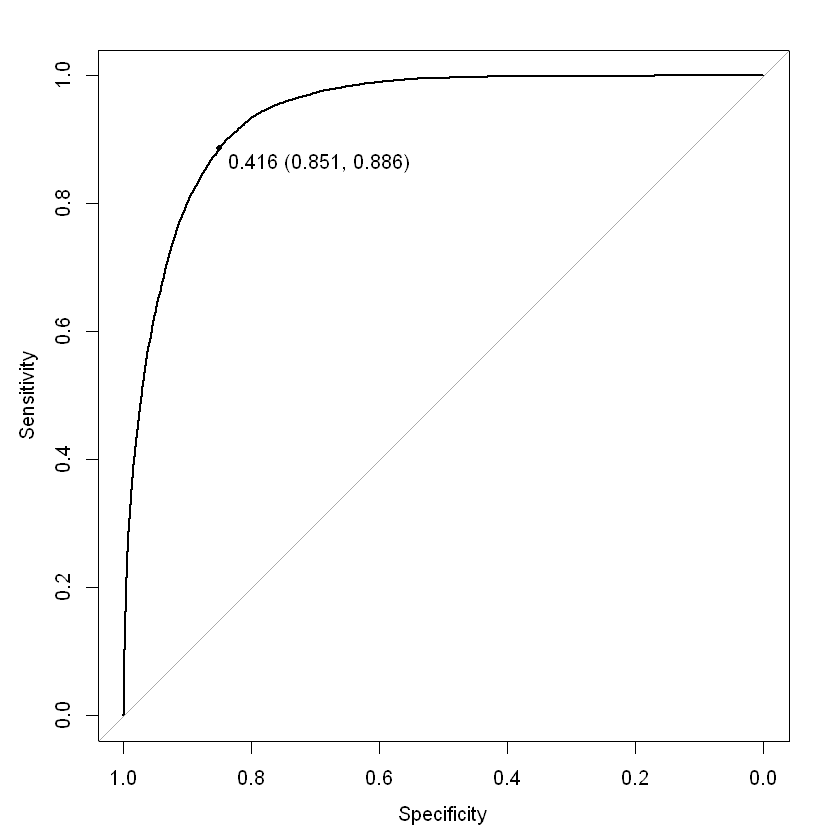

In [26]:
library(pROC)
result.roc <- roc(Y, result.predicted.prob$OK) # Draw ROC curve.
plot(result.roc, print.thres="best", print.thres.best.method="closest.topleft")

In [27]:
save(model, file="gbm.Rdata")